In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

## Missing dates in a range of dates
- [Date ranges](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.date_range.html)
- [Numpy zeros like](https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros_like.html)
- [Matplotlib colormap - cmap](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html)
- [cmap-diverging](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html#diverging)
- [Fixing timestamp compatibility issues](https://stackoverflow.com/a/47414817)

In [2]:
# For fixing timestamp compatibility issues
import pandas.plotting._converter as pandacnv
pandacnv.register()

In [3]:
data = pd.DataFrame()
dates = pd.concat([pd.Series(pd.date_range(start = '2018-09-01', end = '2018-12-07')),
                   pd.Series(pd.date_range(start = '2018-12-10', end = '2019-05-07')),
                   pd.Series(pd.date_range(start = '2019-06-01', end = '2019-08-07')),
                  pd.Series(pd.date_range(start = '2019-08-30', end = '2019-10-29')),
                  pd.Series(pd.date_range(start = '2019-11-03', end = '2019-12-27')),
                  pd.Series(pd.date_range(start = '2020-01-01', end = '2020-08-30'))], ignore_index=True)
data['Dates'] = dates
data['Price'] = np.random.randint(low = 2, high = 120, size = len(data['Dates']))
data.head()

,Dates,Price
0,2018-09-01,23
1,2018-09-02,11
2,2018-09-03,50
3,2018-09-04,100
4,2018-09-05,8


Created two dataframes with dates - one having all dates including the missing ones and the other with the actual dates data.
On merging using left join on the dates we get NaN value for the missing dates on the resulting dataframe.

In [4]:
date_range = pd.date_range(data['Dates'].min(), data['Dates'].max())
data_dates = pd.DataFrame(list(data['Dates']), index = data['Dates'])
data_dates.columns = ['dates']
df_range = pd.DataFrame(index = date_range)
df_range = pd.merge(df_range, data_dates, how = 'left', left_index=True, right_index= True)
df_range['IsPresent'] = df_range.dates.notnull()
df_range.head()

,dates,IsPresent
2018-09-01,2018-09-01,True
2018-09-02,2018-09-02,True
2018-09-03,2018-09-03,True
2018-09-04,2018-09-04,True
2018-09-05,2018-09-05,True


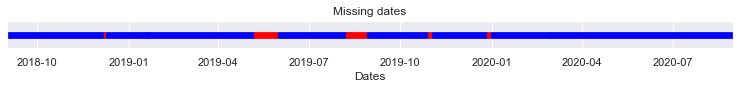

In [5]:
plt.figure(figsize=(13,0.5));
plt.scatter(x = df_range.index, y = np.zeros_like(list(df_range.index)), c = 1 - df_range.IsPresent, marker = '|',\
            cmap = 'bwr', linewidth = 3);
plt.xlabel('Dates');
plt.yticks([]);
plt.title("Missing dates");
plt.xlim(data.Dates.values.min(), data.Dates.values.max());
plt.show();

The red __|__ shows the missing dates.